In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')

In [2]:
from importlib import reload

import numpy as np
import tensorflow as tf
import logging
from scipy import linalg

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import dev_ori_sel_RF
from dev_ori_sel_RF import integrator_tf,dynamics,network,run_onelayer
from dev_ori_sel_RF import data_dir
from dev_ori_sel_RF.tools import misc,update_params_dict

2023-03-31 10:49:46.418933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Please install GPU version of TF


2023-03-31 10:49:54.485759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [61]:
reload(misc)

config_dict = misc.load_external_params("params_test")

N4 = config_dict["N4"]
Nlgn = config_dict["Nlgn"]
Nret = config_dict["Nret"]
Nlgnpop = 2
N4pop = config_dict["num_lgn_paths"] // Nlgnpop

MISC params_dict params_test {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_eccentricity': 0

In [62]:
reload(run_onelayer)
reload(integrator_tf)
run_onelayer.parameter_sweep_layer4(0,config_dict,not_saving_temp=False)

Please install GPU version of TF
# of stimuli: 16
mode in get_RFs initialize
CHECK radius 0.15
CHECK radius 0.15
mode in get_RFs initialize
CHECK radius 0.15
CHECK radius 0.15
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

W4to4 (800, 800)
Starting simulation. This might take a while...
...
max_freq 4.2 0.23809523809523808 1.4959965017094252
self.weight_strength 1.0
self.weight_strength 1.0
Number of plasticity steps: 32
lgn (4, 400) tf.Tensor(4.525697, shape=(), dtype=float32)

Plasticity step: 0, exp: 0, input: 0
Comment out next line if ru

Comment out next line if running with antolik_etal settings
L4 25 38.429592 94.35896 0 0
key dW_lgn_e 25 0.7572016 2.8967106
key dW_lgn_i 25 0.9444327 2.5384138
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.315908, shape=(), dtype=float32)

Plasticity step: 26, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 26 38.455643 88.27242 0 0
key dW_lgn_e 26 0.78910744 2.6772513
key dW_lgn_i 26 0.993519 2.406254
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.848301, shape=(), dtype=float32)

Plasticity step: 27, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 27 39.75683 81.53861 0 0
key dW_lgn_e 27 0.7752318 2.494283
key dW_lgn_i 27 0.9799831 2.3111732
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.2804503, shape=(), dtype=float32)

Plasticity step: 28, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 28 45.792976 80.31269 0 0
key dW_lgn_e 28 0.8864052 2.394102

In [14]:
def imshowbar(ax,A,**kwargs):
    imsh = ax.imshow(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(imsh, cax=cax, orientation='vertical')

['W', 'l4']
(2, 2, 20, 20, 20, 20)
(2, 20, 20)


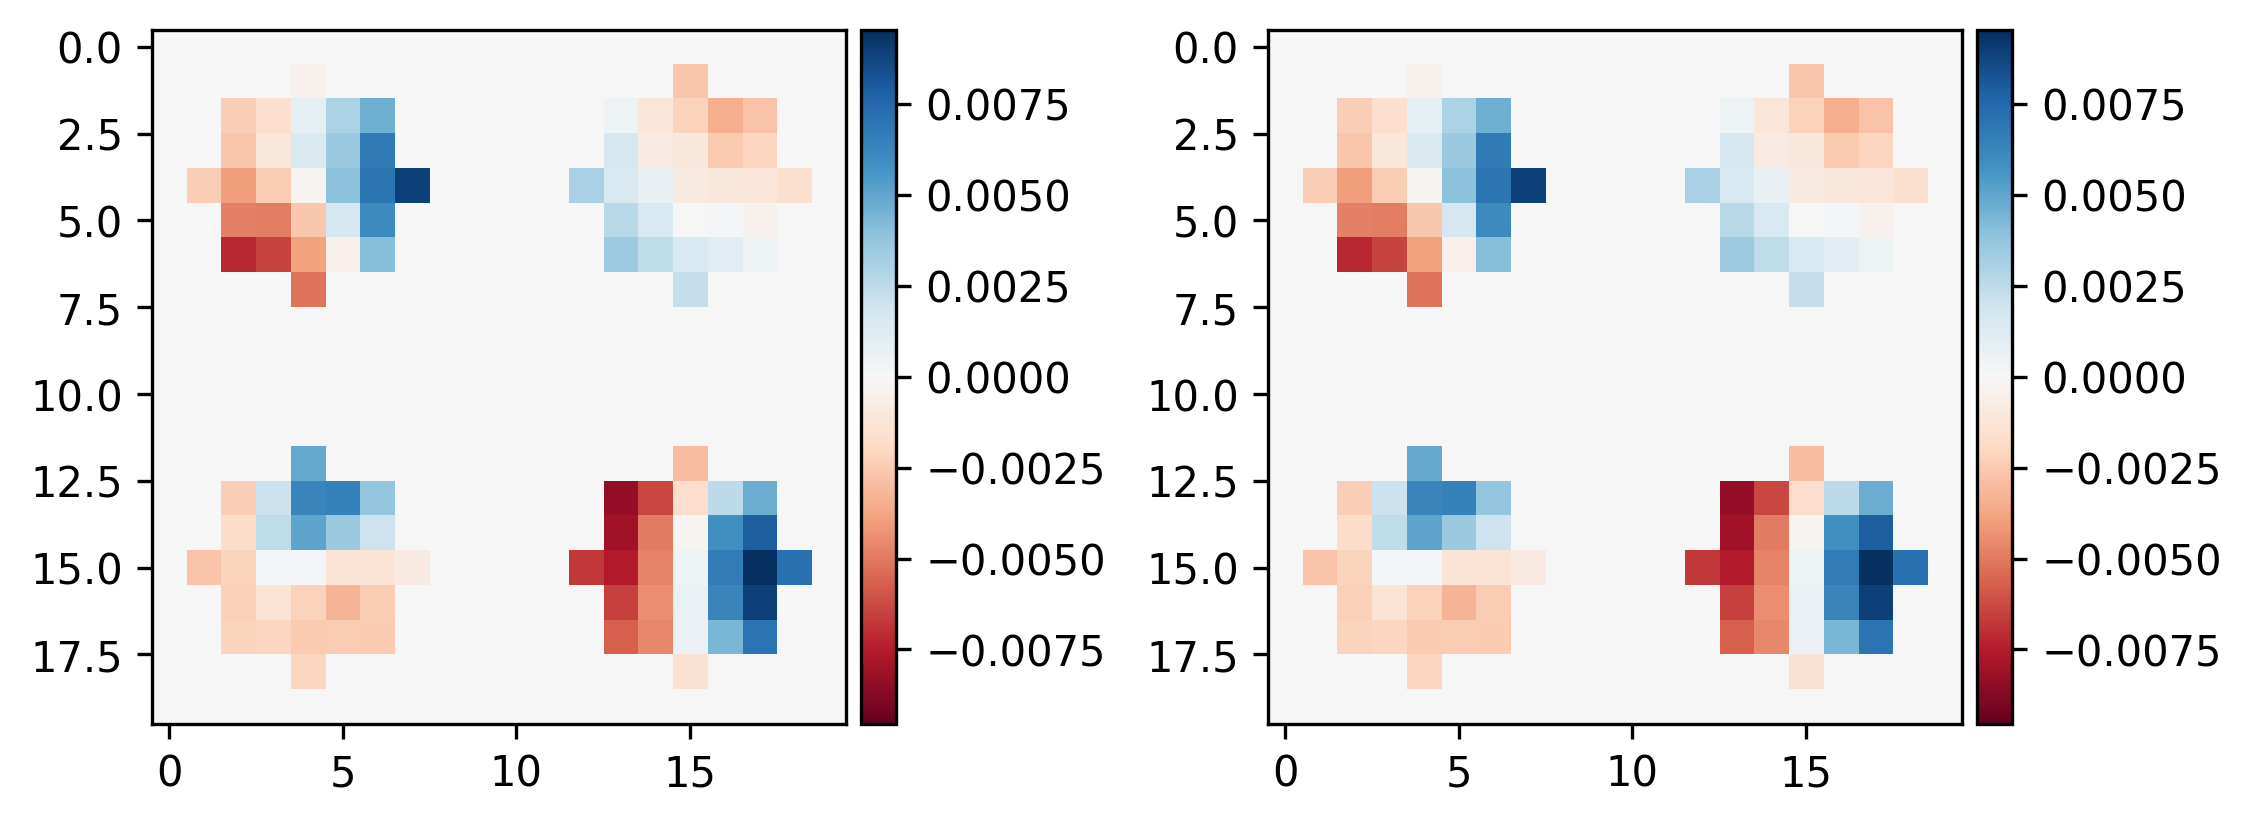

In [63]:
with np.load(data_dir+'/layer4/v0/y_v0.npz') as data:
    print(list(data.keys()))
    print(data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4).shape)
    print(data['l4'].reshape(N4pop,N4,N4).shape)
    wff = data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4)[:,:,:,:,[4,-5],:][:,:,:,:,:,[4,-5]]
    rf = np.sum(wff[:,0]-wff[:,1],axis=(-2,-1))

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace = .5, wspace=.5)
for i in range(2):
    imshowbar(axs[i],rf[i],cmap='RdBu',vmin=-np.max(np.abs(rf[i])),vmax=np.max(np.abs(rf[i])))

['Wt', 'l4t']
(6, 2, 2, 20, 20, 20, 20)
(6, 2, 20, 20)


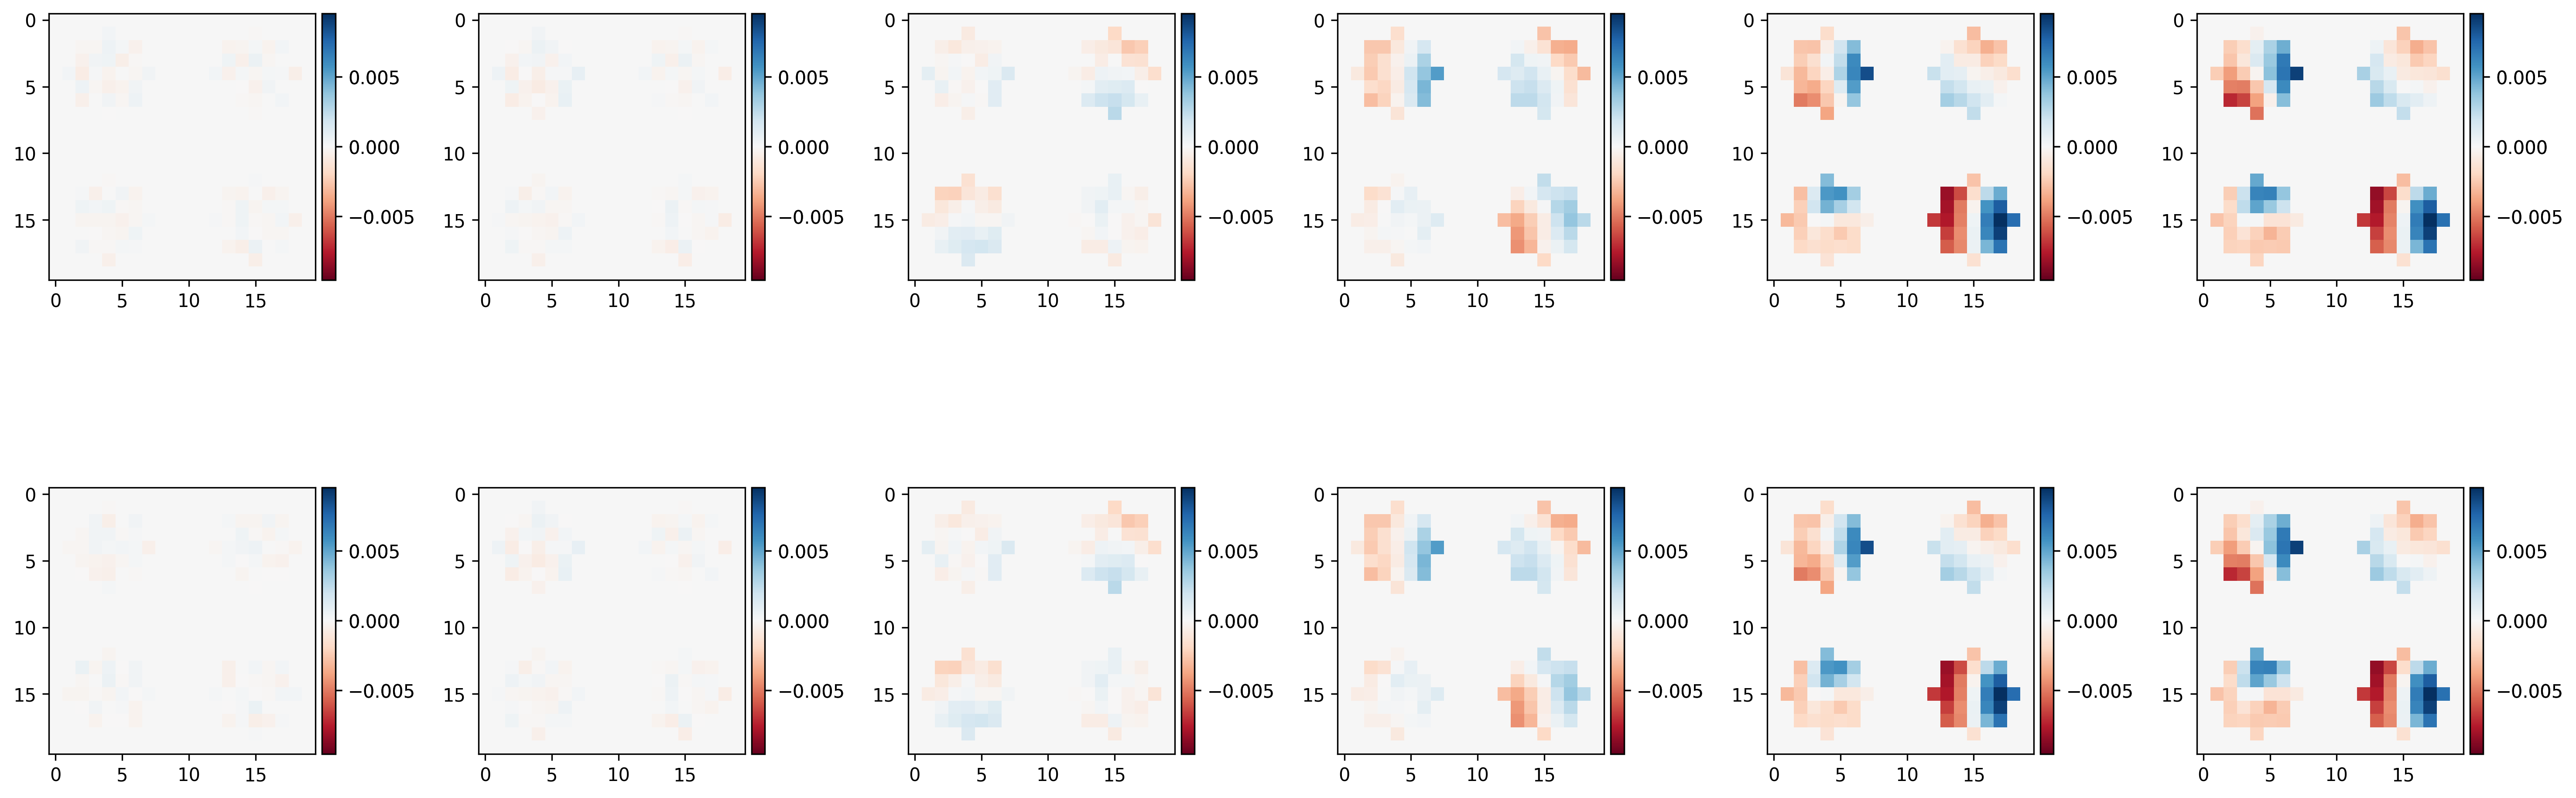

In [65]:
with np.load(data_dir+'/layer4/v0/yt_v0.npz') as data:
    print(list(data.keys()))
    print(data['Wt'].reshape(-1,N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4).shape)
    print(data['l4t'].reshape(-1,N4pop,N4,N4).shape)
    wfft = data['Wt'].reshape(-1,N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4)[:,:,:,:,:,[4,-5],:][:,:,:,:,:,:,[4,-5]]
    rft = np.sum(wfft[:,:,0]-wfft[:,:,1],axis=(-2,-1))

fig,axs = plt.subplots(2,len(rft),figsize=(4*len(rft),8),dpi=300)
fig.subplots_adjust(hspace = .5, wspace=.5)
for i in range(2):
    for j in range(len(rft)):
        imshowbar(axs[i,j],rft[j,i],cmap='RdBu',vmin=-np.max(np.abs(rft)),vmax=np.max(np.abs(rft)))
        imshowbar(axs[i,j],rft[j,i],cmap='RdBu',vmin=-np.max(np.abs(rft)),vmax=np.max(np.abs(rft)))

In [9]:
misc.load_data(0,data_dir+'/layer4/v0/',config_dict)

yt[] 2 20 1 20


(array([[[[0.03462555, 0.03466414, 0.03423567, ..., 0.        ,
           0.03427319, 0.0341265 ],
          [0.03441367, 0.03428974, 0.03476357, ..., 0.        ,
           0.        , 0.03457609],
          [0.03437204, 0.03426903, 0.0342117 , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.0346266 ,
           0.03424986, 0.03444321],
          [0.03473304, 0.        , 0.        , ..., 0.03426967,
           0.03472544, 0.03445064],
          [0.03436487, 0.03427092, 0.        , ..., 0.03463211,
           0.03445666, 0.03452761]],
 
         [[0.03473257, 0.03414059, 0.03440337, ..., 0.        ,
           0.03455082, 0.0345483 ],
          [0.03432926, 0.03417086, 0.03431723, ..., 0.        ,
           0.        , 0.03482284],
          [0.03469604, 0.03442774, 0.03439972, ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.03410288,
   